# Seaborn
* Seaborn is a statistical plotting library (built on top of matplotlib)
* Seaborn has beautiful default styles
* Sebaorn is also designed to work really well with Pandas dataframes

In [18]:
import seaborn as sns
%matplotlib inline

### Distribution Plots

Visualize the distribution of univariate data.

In [2]:
# Example: Tips
# Load the dataset and check it out
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


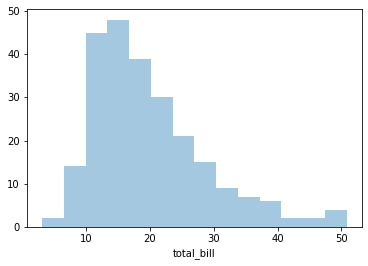

In [3]:
# Visualize the distribution of the total bill
sns.distplot(tips['total_bill'],kde=False) # Create a distribution plot of the data (and remove the kernel density estimate)

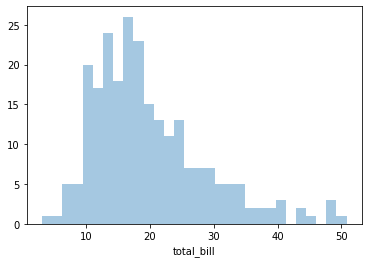

In [4]:
# Get more definition in the distribution 
sns.distplot(tips['total_bill'],kde=False,bins=30) # Change the number of bins in the histogram 

### Joint Plots
Visualize the distribution of bivariate data.

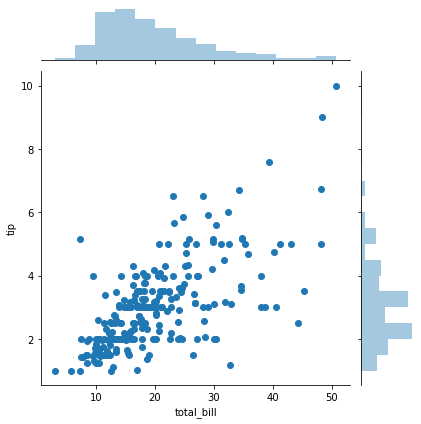

In [5]:
# Visualize how the total bill and tip size vary with respect to each other
sns.jointplot(x='total_bill',y='tip',data=tips) # Create a joint plot with total bill and tips as the params

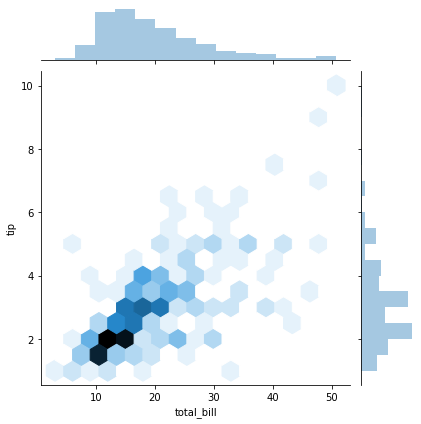

In [6]:
# You can change the kind of joint plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') # Hexagon representation 

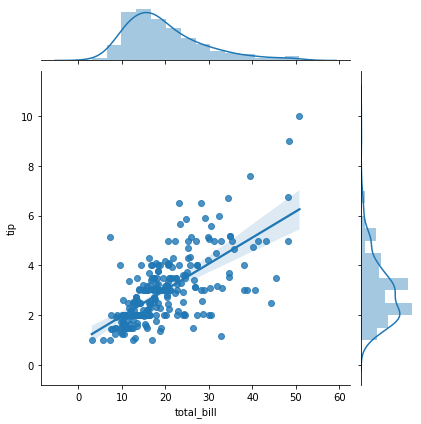

In [7]:
# More kinds of joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # Regression 

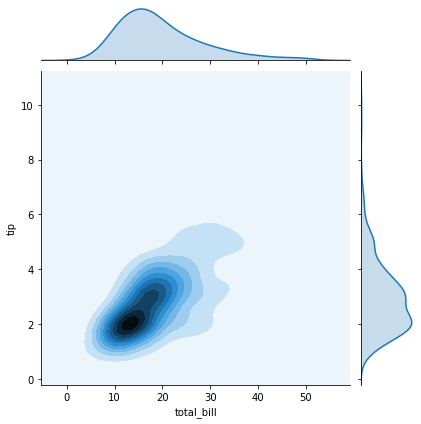

In [8]:
# More kinds of joint plots
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde') # KDE (shows the density of where the data points are located)

### Pairplot

Pairplots plot pairwise relationships across the numerical columns of an entire dataframe (and supports a color hue argument fo categorical columns).

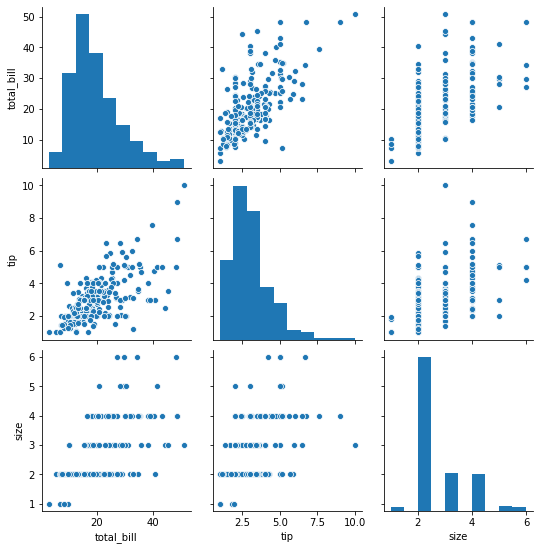

In [9]:
# Create a pairplot for the tips dataframe
sns.pairplot(tips) # Creates scatterplots for each pair (and histogram when column compared to itself)

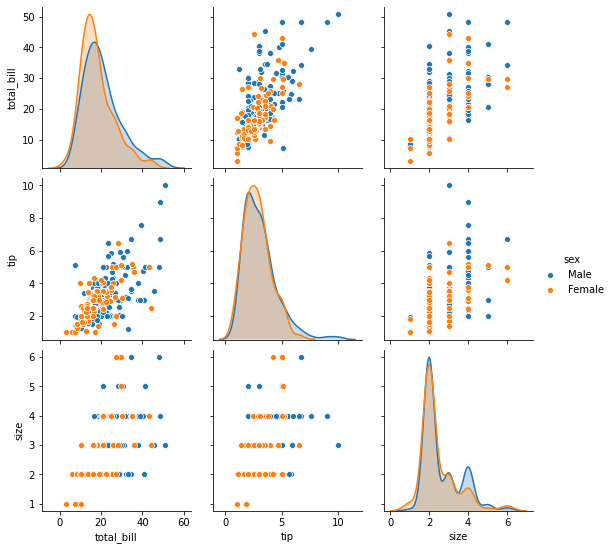

In [10]:
# Add a hue to visualize categorical data
sns.pairplot(tips,hue='sex') # See how sex varies with other variables 

### Rugplot

Draws a dash on the x axis for every data point that appears on a univariate scale (shows where most points are located).

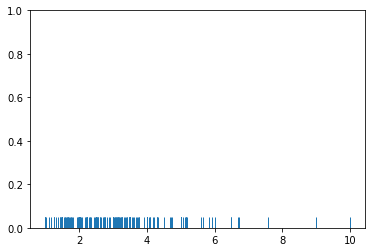

In [11]:
# Make a rug plot for the tip size
sns.rugplot(tips['tip']) # Most tips between 1 and 4 dollars

### KDE (Kernal Density Estimation) Plots

The KDE plot is constructed by summing the normal Gaussian distributions centered around every data point (as on a rugplot). 

(0.0, 1.0)

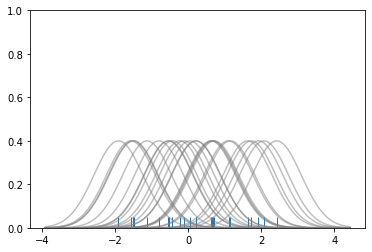

In [12]:
# Example: Step 1 - Create normal Gaussian distributions for every data point

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)
# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2
# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Create a rugplot
sns.rugplot(dataset)

# Set up the bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

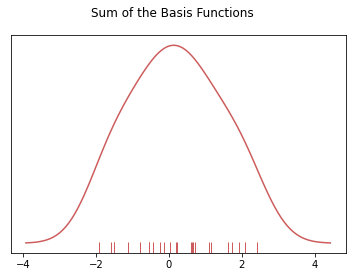

In [13]:
# Example: Step 2 - Sum the normal Gaussian distributions to get the kde plot

# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

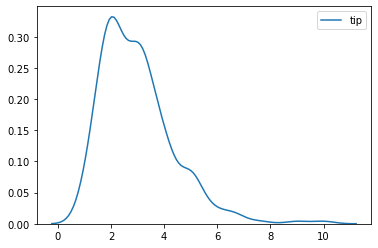

In [14]:
# If you don't want the bars from the rug plot, you can create just a kde plot 
sns.kdeplot(tips['tip'])

## Categorical Plots

In [1]:
import seaborn as sns 
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Barplots

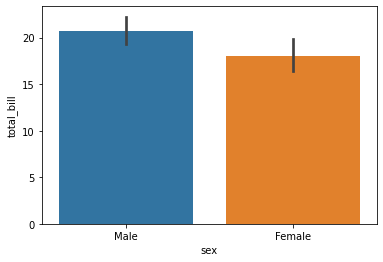

In [2]:
# Create a bar plot with a categorical variable on the x axis and numeric on the y axis
sns.barplot(x='sex',y='total_bill',data=tips) # Get the average  total bill for each sex

#### Visualizing other factors on bar plots 

You can set the `estimator` parameter to change from average to another function. You can pass in built in functions or create your own.

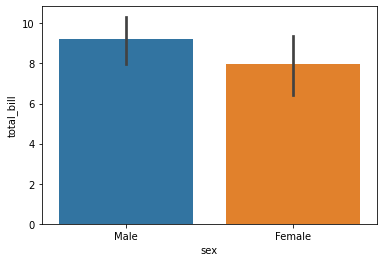

In [3]:
import numpy as np
# Create a bar plot visualizing another metric
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) # Plot the standard deviation of the total bill for each sex

### Countplots

Countplots count the number of occurrences of each value for a categorical variable. 

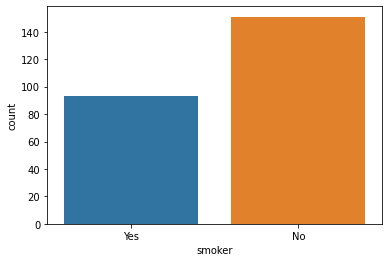

In [4]:
# Create a count plot for a categorical variable
sns.countplot(x='smoker',data=tips) # Count the number of smokers and non-smokers

### Boxplots

Boxplots visualize the distribution of quantitative data across categorical variables. 

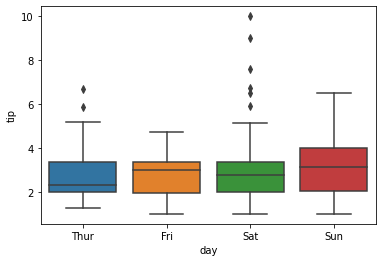

In [6]:
# Create a box plot
sns.boxplot(x='day',y='tip',data=tips) # Get the distribution of tips for each day of the week

#### "Multilevel" boxplots

Add a `hue` parameter to separate the data by another categorical variable.

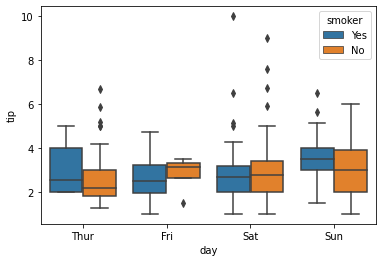

In [7]:
# Create a box plot
sns.boxplot(x='day',y='tip',data=tips, hue='smoker') # Get the distribution of tips for smokers and non-smokers for every day of the week

### Violin Plots

Violin plots show the kernel density estimation of the underlying distributions. 

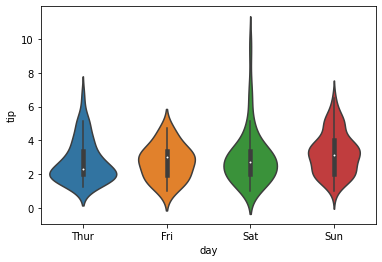

In [9]:
# Create a violin plot
sns.violinplot(x='day',y='tip',data=tips) # Get the distribution of tips for every day of the week

#### "Multilevel" violin plots

Add a `hue` parameter to separate the data by another categorical variable. You can also add `split` to visualize them on the same violin. 

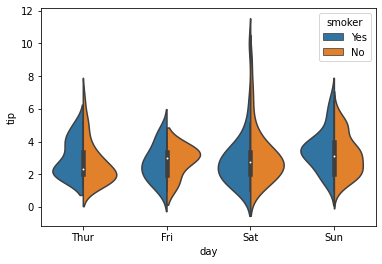

In [10]:
# Create a violin plot
sns.violinplot(x='day',y='tip',data=tips,hue='smoker',split=True) # Get the distribution of tips for smokers and non-smokers for every day of the week

### Strip Plots

Strip plots allow you to visualize scattered data points on a categorical variable. 

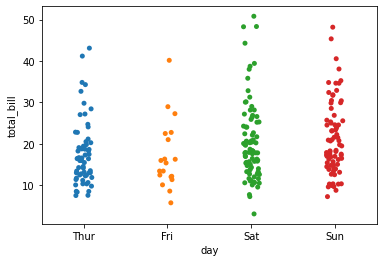

In [11]:
# Create a strip plot to show scattered data on a categorical x axis
sns.stripplot(x='day',y='total_bill',data=tips) # Plot the totall bill data for each day

#### "Multilevel" strip plots

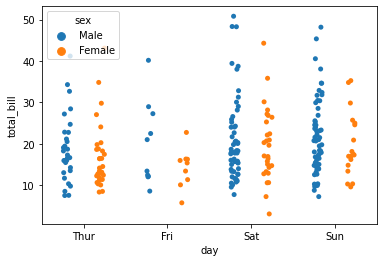

In [14]:
# Create a strip plot to show scattered data on a categorical x axis
sns.stripplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True) # Plot the totall bill data for males and females for each day

### Swarm Plot

Combine violin plots and strip plots. Don't scale well with large datasets.

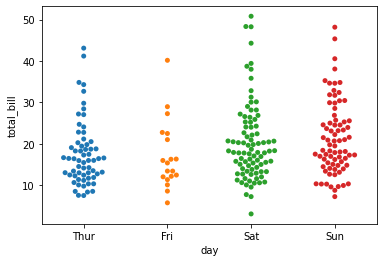

In [15]:
# Create a swarm plot
sns.swarmplot(x='day',y='total_bill',data=tips) # Show the total bill data per day

#### "Multilevel" swarm plots

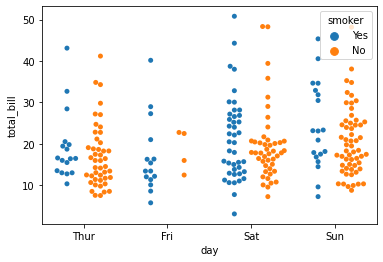

In [18]:
# Create a swarm plot
sns.swarmplot(x='day',y='total_bill',data=tips,hue='smoker',dodge=True) # Show the total bill data per day for smokers/non-smokers

#### Combining swarm plots and violin plots

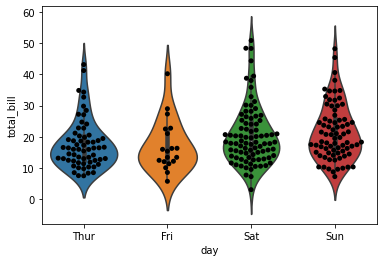

In [20]:
# Create a violin plot
sns.violinplot(x='day',y='total_bill',data=tips)
# Stack a swarm plot on top
sns.swarmplot(x='day',y='total_bill',data=tips,color='black') 

### Cat Plots

Cat plot is the most generic form of plots. You just specify the `kind` for which plot you want

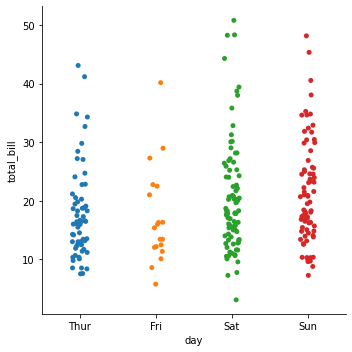

In [27]:
# default - strip
sns.catplot(x='day',y='total_bill',data=tips)

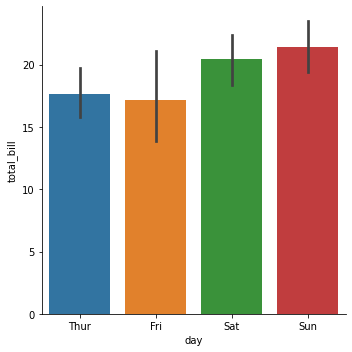

In [26]:
# bar plot
sns.catplot(x='day',y='total_bill',data=tips,kind='bar')

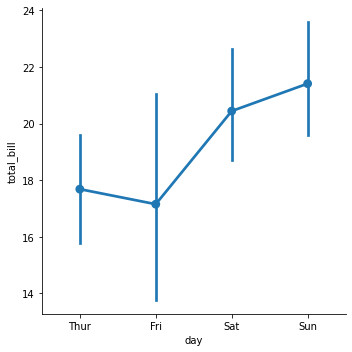

In [28]:
# Point plot
sns.catplot(x='day',y='total_bill',data=tips,kind='point')

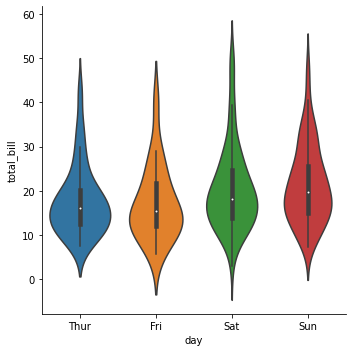

In [29]:
# Violin plot
sns.catplot(x='day',y='total_bill',data=tips,kind='violin')

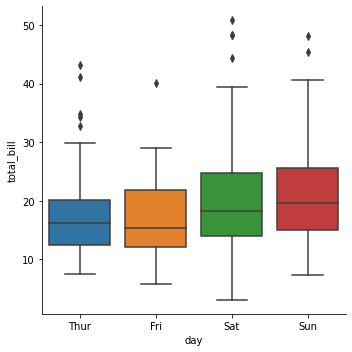

In [30]:
# Box Plot
sns.catplot(x='day',y='total_bill',data=tips,kind='box')

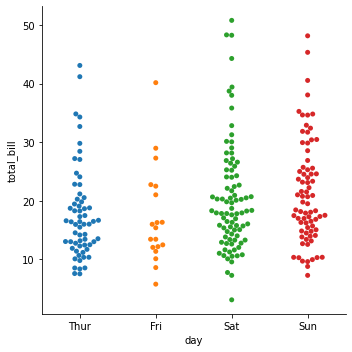

In [31]:
# swarm plot
sns.catplot(x='day',y='total_bill',data=tips,kind='swarm')

## Matrix Plots

In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Heatmaps

You'll need your data in matrix form to create a heat map

#### Create a heatmap from a correlation matrix

In [2]:
# Transform data to matrix form
tc = tips.corr() # Create a correlation matrix
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


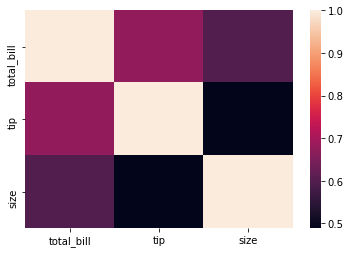

In [3]:
# Create a heatmap from the matrix data
sns.heatmap(tc)

##### You can annotate the actual values on the heatmap

Use the `annot` parameter to add the values in the cells

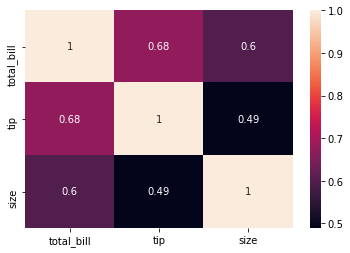

In [4]:
# Create a heatmap from the matrix data
sns.heatmap(tc, annot=True) # annotated

##### You can specify a specific color map for the gradient

Use `cmap` to specify a color map.

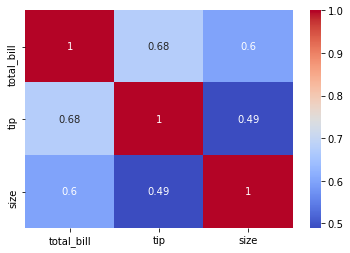

In [5]:
# Create a heatmap from the matrix data
sns.heatmap(tc, annot=True,cmap='coolwarm') # annotated, coolwarm gradient

#### Create a heatmap from a pivot table

In [6]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [7]:
# Transform the data into a matrix
pvt = flights.pivot_table(index='month',columns='year',values='passengers') # Create a pivot table
pvt

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


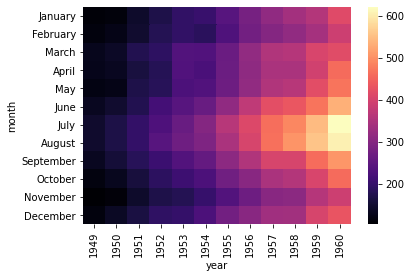

In [9]:
# Create a heatmap from the pivot table
sns.heatmap(pvt,cmap='magma') 

##### You can separate the cells in a heatmap

You can add the parameters `linecolor` and `linewidths` to place lines in between heatmap grid cells.

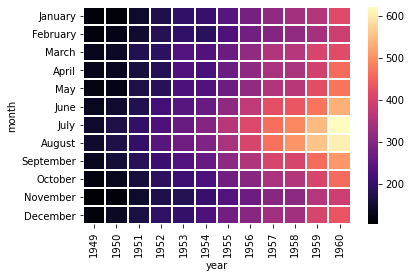

In [10]:
## Create a heatmap from the pivot table
sns.heatmap(pvt,cmap='magma',linecolor='white',linewidths=1) 

### Cluster Maps

The cluster map uses hierarchal clustering to produce a clustered version of this heat map. i.e. It tries to put together rows and columns based on their similarity.

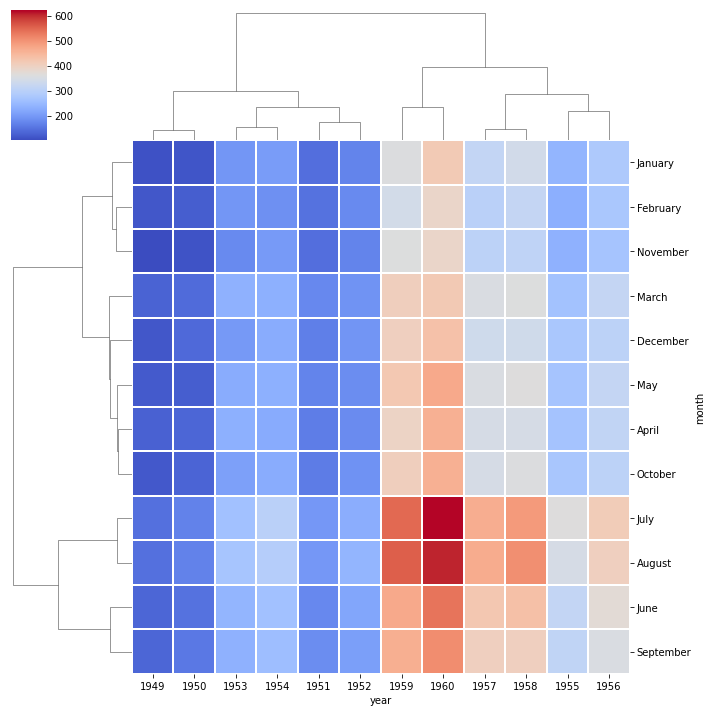

In [11]:
## Create a cluster map
sns.clustermap(pvt,cmap='coolwarm',linecolor='white',linewidths=1) #e.g. 1959-1960 similar cols and April-October similar rows

#### Standardizing the scales

Use the parameter `standard_scale` to normalize the scale.

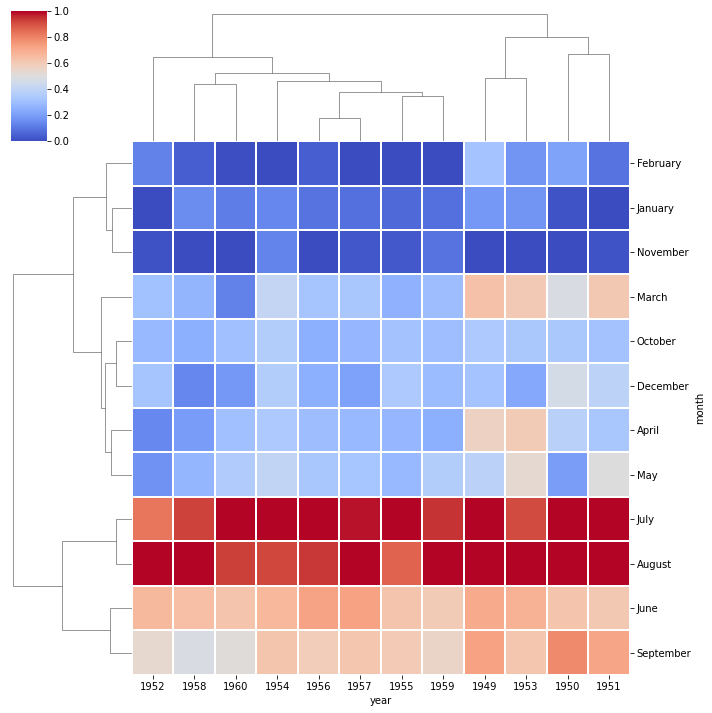

In [12]:
## Create a cluster map with a standardized scale
sns.clustermap(pvt,cmap='coolwarm',linecolor='white',linewidths=1,standard_scale=1) 

## Grids

In [13]:
# Get some data
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Pair Grids

Gives us a lot more control over pair plots

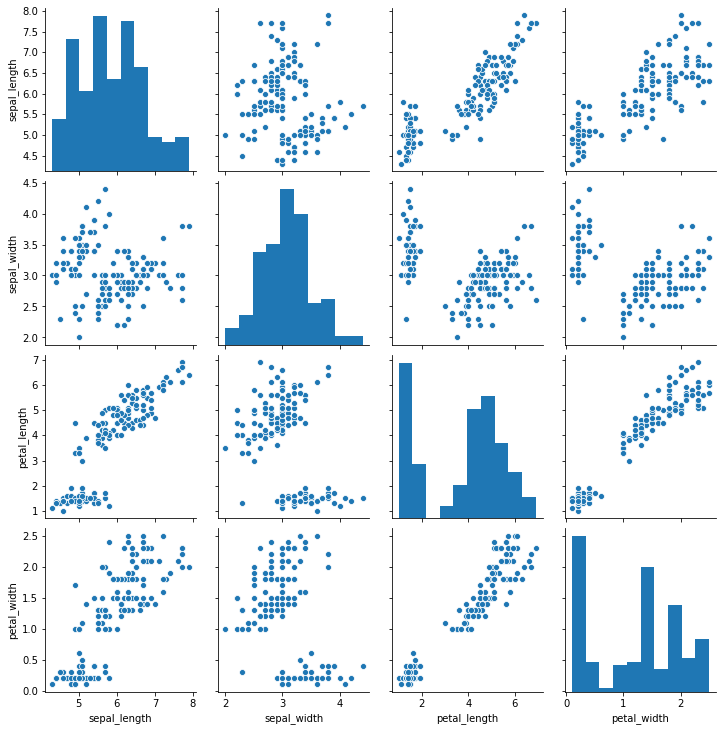

In [14]:
# Normal pairplot
sns.pairplot(iris) # create a pairplot (distribution plot) for all the pairs of columns in the dataset

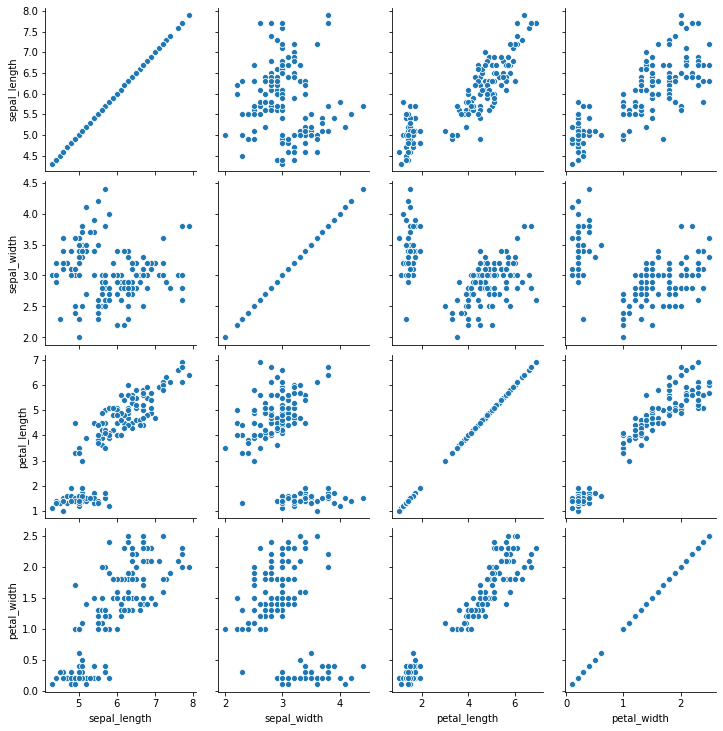

In [34]:
# Create an empty PairGrid
grid = sns.PairGrid(iris)
# Map any function onto the pair grid
grid.map(sns.scatterplot) # scatter plots

#### You can control the plots of each area of the PairGrid

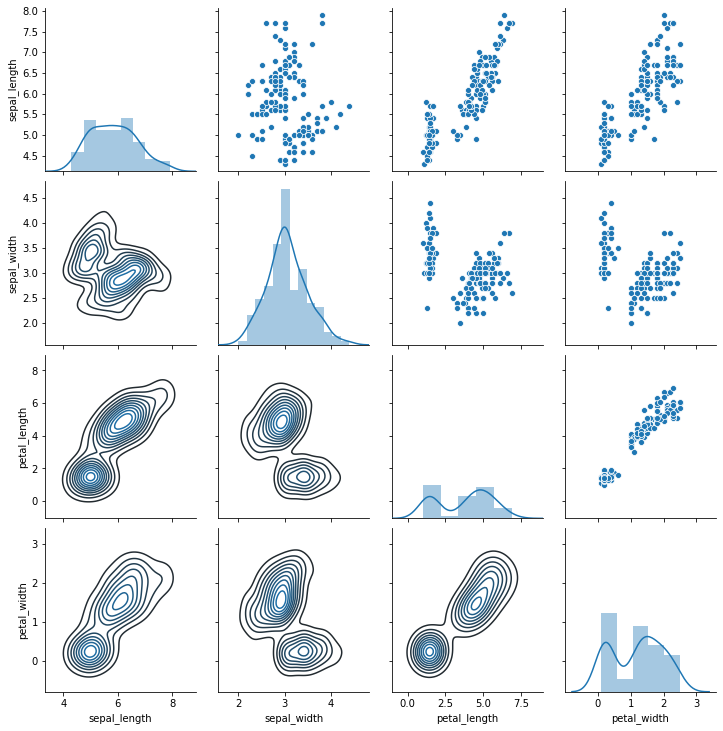

In [35]:
# Create an empty PairGrid
grid = sns.PairGrid(iris)
# Map any function onto the pair grid
grid.map_diag(sns.distplot) # Distribution plots on the diagonal grids
grid.map_upper(sns.scatterplot) # scatter plots on the upper grids
grid.map_lower(sns.kdeplot) # KDE plots on the lower grids

### Facet Grids

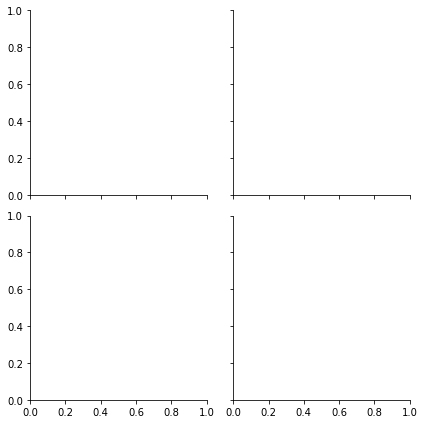

In [25]:
# Step 1: Create a FacetGrid
fg = sns.FacetGrid(tips,col='time',row='smoker') # Columns = Time (lunch vs. dinner) | rows = Smoker (Yes vs. No)
fg

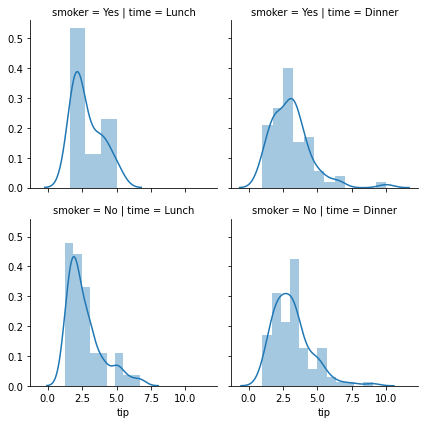

In [31]:
# Step 2: Map a function onto the grid
fg = sns.FacetGrid(tips,col='time',row='smoker')
fg.map(sns.distplot, 'tip') # Get the distribution of the tip amount for every combination of lunch/dinner and smoker/non-smoker

#### You can also plot two variables on FacetGrids while separating with two other variables

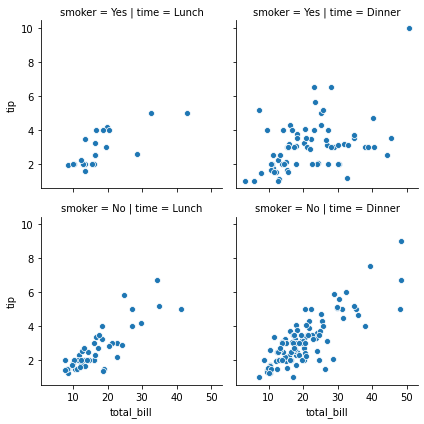

In [33]:
# Step 2: Map a function onto the grid
fg = sns.FacetGrid(tips,col='time',row='smoker')
fg.map(sns.scatterplot,'total_bill','tip') # Get the distribution of the tip amount for every combination of lunch/dinner and smoker/non-smoker

## Regression Plots

More on these in the machine learning notebook.

### Linear Model (lm) Plots

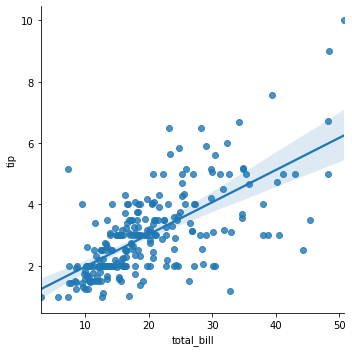

In [36]:
# Create an lmplot
sns.lmplot(x='total_bill',y='tip',data=tips) # Create a linear model for predicting the tip value from the total bill value

#### More customizations

##### You can specify `hue` to separate by a categorical feature

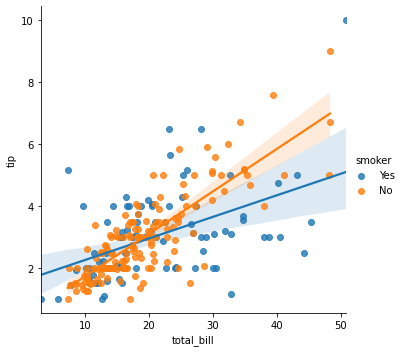

In [37]:
# Create an lmplot
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker') # smokers and non-smokers tips based on the total bill

##### You can add matplotlib style marker customizations

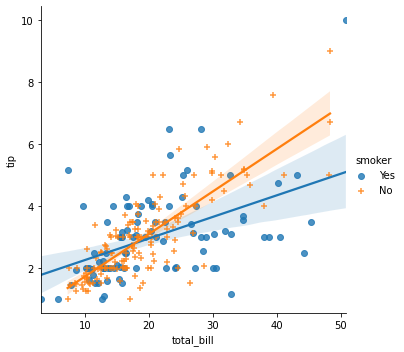

In [39]:
# Create an lmplot with custom markers
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',markers=['o','+']) # smokers are dots, non-smokers pluses

##### You can change the size of the scatterplot

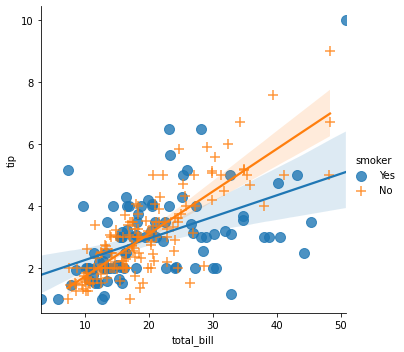

In [40]:
# Increase the size
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',markers=['o','+'], scatter_kws={'s':100}) # call scatter_kws to increase the scatter plot size

##### You can separate by categorical values into a grid 

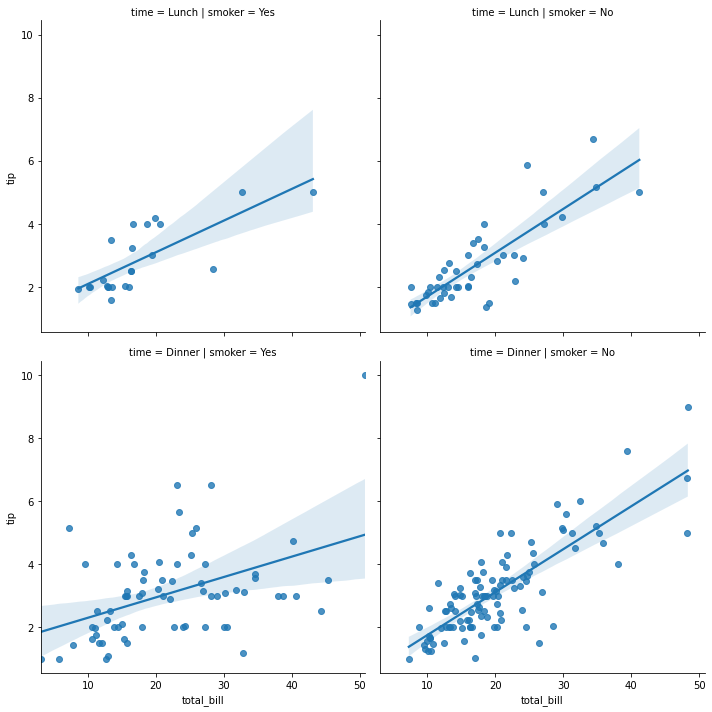

In [41]:
# Make separate lmplots for each value 
sns.lmplot(x='total_bill',y='tip',data=tips,col='smoker',row='time') # smoker/non-smoker and lunch/dinner

##### You can separate by hue in combination with grids

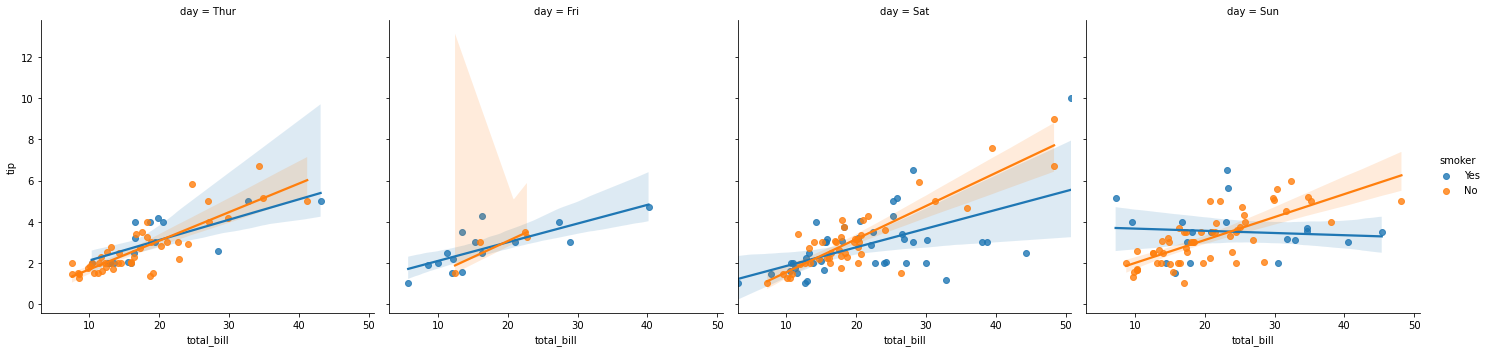

In [42]:
# Increase the size
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='smoker') 

#### You can change the aspect ratio and size of the plots

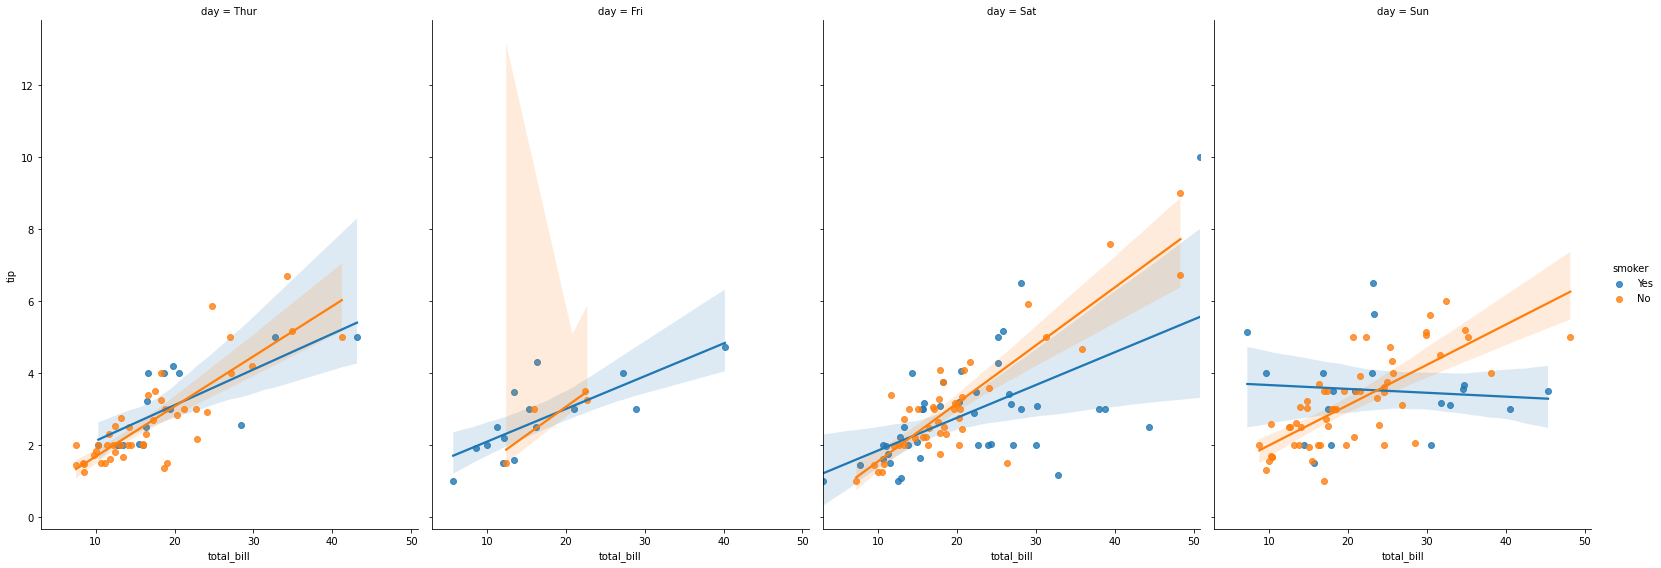

In [45]:
# Make bigger plot to see better
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='smoker',aspect=0.7,height=8) 

## Style and Color

###### You can set the style of your seaborn plots with `set_style`. Options are darkgrid, whitegrid, dark, white, ticks

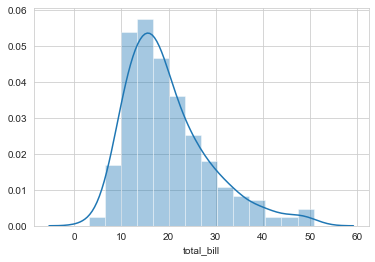

In [47]:
# Set the aesthetic to whitegrid
sns.set_style('whitegrid')
# Create a distribution plot with the white grid background
sns.distplot(tips['total_bill'])

##### You can remove the top and right axes (spines) with `despine`

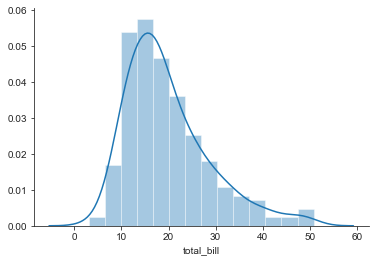

In [50]:
# Style the plots
sns.set_style('ticks')
# Plot the distribution of total bill
sns.distplot(tips['total_bill'])
# Remove the spines
sns.despine()

#### You can set the figure size in matplotlib's figure 

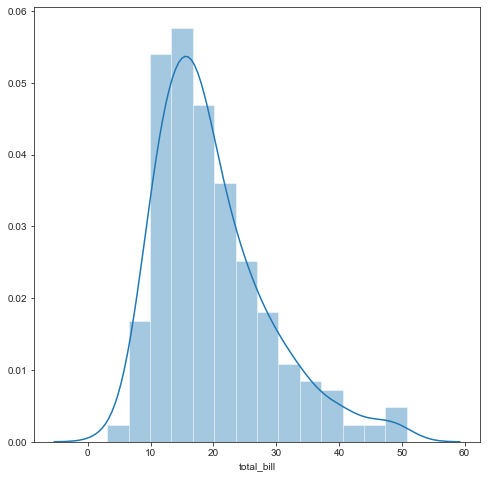

In [51]:
# set the figure size
plt.figure(figsize=(8,8))
# Plot the distribution of total bill
sns.distplot(tips['total_bill'])

##### You can set the context of where the figure will be used for good automatic styling. Works for paper, notebook, talk, poster.

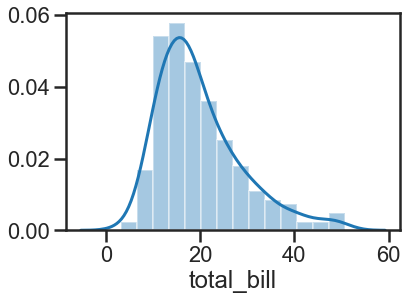

In [53]:
# set the context to poster
sns.set_context('poster')
# Plot the distribution of total bill
sns.distplot(tips['total_bill'])

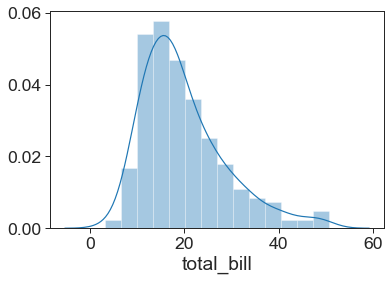

In [58]:
# You can also modify the font size

# set the context to paper and increase the font size
sns.set_context('paper',font_scale=2)
# Plot the distribution of total bill
sns.distplot(tips['total_bill'])

##### You can specify the color with `palette`

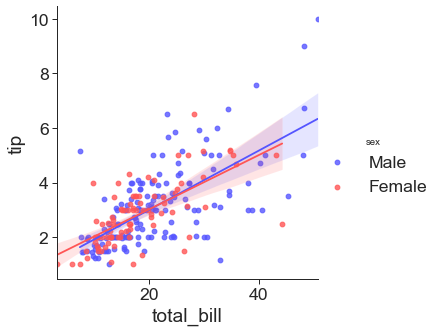

In [62]:
# Create an lmplot with a specified palette. Look up matplotlib colormaps for more
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')